In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [116]:
path = 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
df = pd.read_csv(path, index_col=0)

# The dataset describes advertising dollars spend in each venue (TV, Radio, Newspaper)
# and the corresponding Sales

In [117]:
# Print out the dataframe schema (data dictionary)
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [118]:
# Are there any null values? If so, should we filter out, all, or some? 
df.isnull().values.any()

False

In [119]:
# Print out summary statistics of the dataframe
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [120]:
# show the first 10 rows of the dataframe
df.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [121]:
# how many rows in the dataframe, if you did filter or did not filter?
# Do not use count!. Hint. Look into shape on a dataframe object
df.shape

(200, 4)

In [122]:
# What was the sum of all Sales when spent on Radio was greater than or equal to 10K? 
df_radio = df[df['Radio'] >= 10.0]
sum(df_radio['Sales'])


2280.8999999999996

In [123]:
# create a fourth column in the dataFrame, called All, that symbolizes all advertising dollars spent
# You must use an apply. i.e. df['All'] = df.apply(someFunction, axis = 1)
# When you do axis = 1 you tell it to map line by line instead of column through the entire df
cols = ['TV','Radio','Newspaper']
df_no_sales = df[cols]
df_no_sales['All'] = df_no_sales.apply(sum, axis = 1)
df_no_sales

,TV,Radio,Newspaper,All
1,230.1,37.8,69.2,337.1
2,44.5,39.3,45.1,128.9
3,17.2,45.9,69.3,132.4
4,151.5,41.3,58.5,251.3
5,180.8,10.8,58.4,250.0
6,8.7,48.9,75.0,132.6
7,57.5,32.8,23.5,113.8
8,120.2,19.6,11.6,151.4
9,8.6,2.1,1.0,11.7
10,199.8,2.6,21.2,223.6


In [124]:
# Create 4 Scatter Plots

# 1. TV Spend Vs Sales (x = TV Spend, y = Sales)
# 2. Radio Spend Vs Sales ( x = Radio Spend, y = Sales )
# 3. Newspaper Spend Vs Sales ( x = Newspaper Spend, y = Sales )
# 4. All Advertisting Spend Vs. Sales ( x = All Advertising Spend, y = Sales )
# HINT: fig, axs = plt.subplots(1, 4, sharey=True), and then use df.plot 4 times
# with correct x and y labels and ax labels.

# What Conclusions can you make? i.e. more advertising dollars spent in TV, increases sales
# More than Radio Sales? 

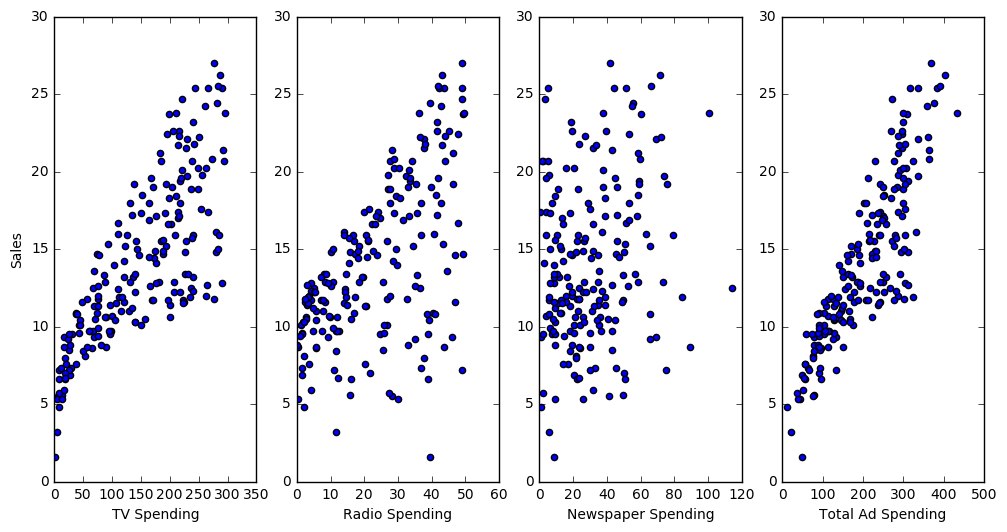

In [125]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(1,4,1)
ax1.scatter(df['TV'],df['Sales'])
ax1.set_xlim(0,350)
ax1.set_xlabel('TV Spending')
ax1.set_ylabel('Sales')
ax2 = fig.add_subplot(1,4,2)
ax2.scatter(df['Radio'],df['Sales'])
ax2.set_xlim(0,60)
ax2.set_xlabel('Radio Spending')
ax3 = fig.add_subplot(1,4,3)
ax3.scatter(df['Newspaper'],df['Sales'])
ax3.set_xlim(0,120)
ax3.set_xlabel('Newspaper Spending')
ax4 = fig.add_subplot(1,4,4)
ax4.scatter(df_no_sales['All'],df['Sales'])
ax4.set_xlim(0,500)
ax4.set_xlabel('Total Ad Spending')

## Conclusions
The graph for radio spending has the steepest slope, so increasing radio spending seems to yield the highest increase in total sales. The graph of total ad spending has the tightest clustering of points so looking at all three media types yields the best prediction of sales.